In [69]:
from RandomLoop import StateSpace
import matplotlib.pyplot as plt 
from matplotlib.collections import LineCollection
import numpy as np

In [17]:
plt.style.use('default')
plt.style.use('seaborn-v0_8-muted')

In [62]:
m = StateSpace(1, 8, 1.2)
m.step(1_000_000)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [44]:
m.summary()

mean number of links: [1.59179688]
max number of links: [7]
mean local time: 3.506666666666667
mean loop length: [23.72222222222222]
max loop length: [354]
steps = 1e+06   acceptance ratio = 0.545313


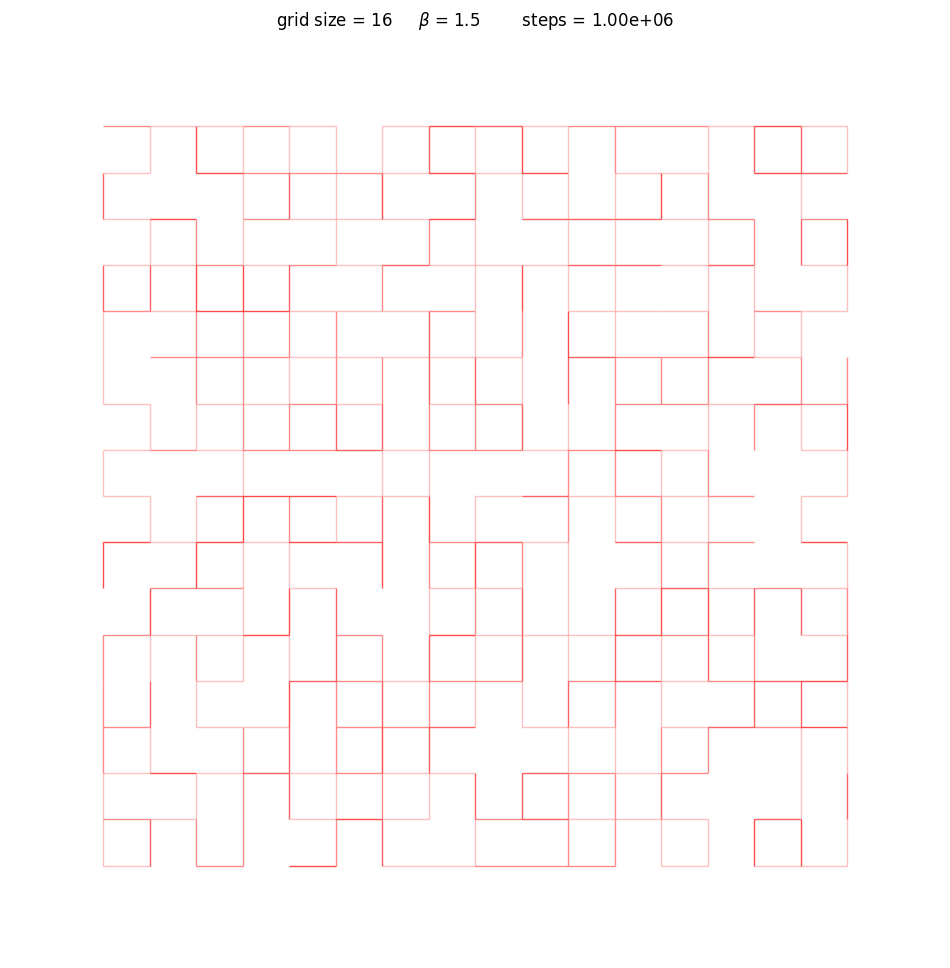

In [45]:
m.plot_overlap()

-0.025
-0.05
0.0
-0.025
-0.025
-0.025
-0.025
-0.05
0.0
-0.05
0.0
-0.025
-0.025
-0.05
0.0
-0.025
-0.07500000000000001
-0.02500000000000001
0.024999999999999994
-0.07500000000000001
-0.02500000000000001
0.024999999999999994
-0.025
-0.05
0.0
-0.07500000000000001
-0.02500000000000001
0.024999999999999994
-0.025
-0.05
0.0
-0.1
-0.05
0.0
0.05000000000000002
-0.05
0.0
-0.05
0.0
-0.025
-0.025
-0.025
-0.025
-0.05
0.0
-0.05
0.0
-0.07500000000000001
-0.02500000000000001
0.024999999999999994
-0.07500000000000001
-0.02500000000000001
0.024999999999999994
-0.05
0.0
-0.025
-0.07500000000000001
-0.02500000000000001
0.024999999999999994
-0.025
-0.07500000000000001
-0.02500000000000001
0.024999999999999994
-0.05
0.0
-0.05
0.0
-0.15000000000000002
-0.10000000000000002
-0.05000000000000002
0.0
0.04999999999999999
0.09999999999999998
-0.05
0.0
-0.05
0.0
-0.05
0.0
-0.025
-0.05
0.0
-0.025
-0.025
-0.05
0.0
-0.025
-0.025
-0.025
-0.05
0.0
-0.025
-0.05
0.0


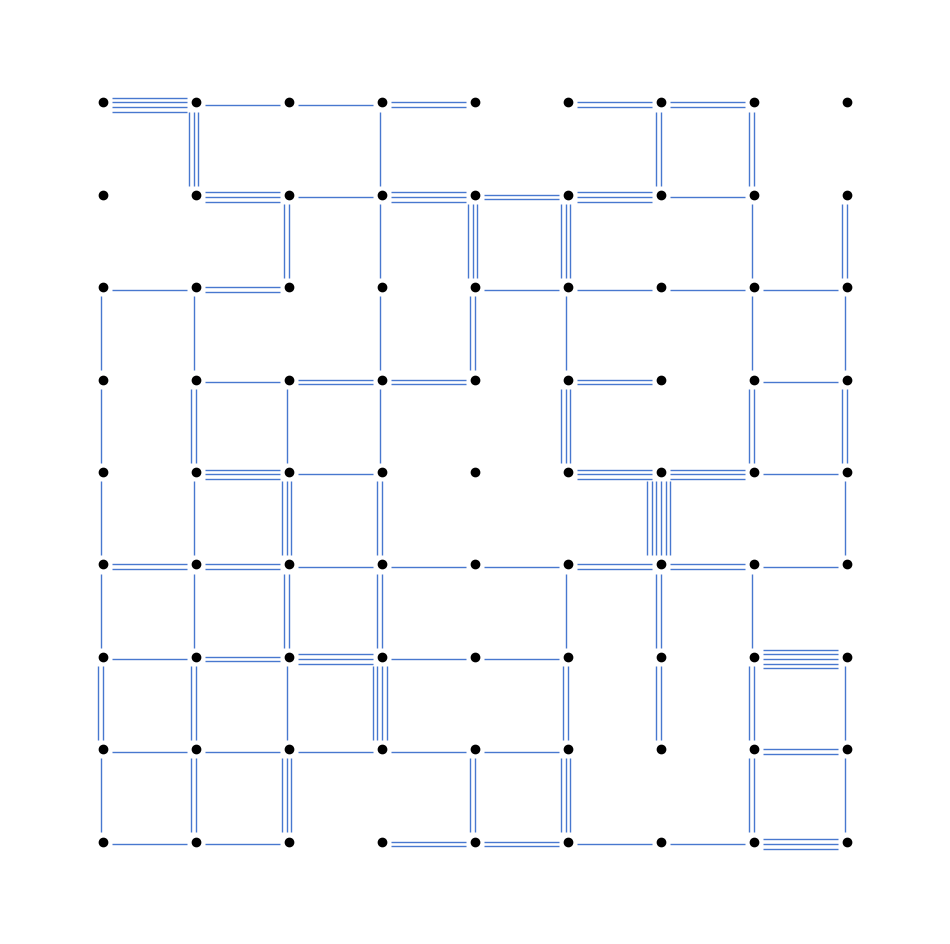

In [77]:
def plot_one_color_v2(grid, c, ax, alpha=1.0, linewidth = 1.0, spacing= 0.05):
        """
        Optimized function to plot grid lines of color c using batch drawing with LineCollection for efficiency.
        
        Args:
          c: The color to be plotted.
          cmap: The colormap to be used for plotting.
          ax: The axis on which to plot the grid.
          alpha: The transparency level for the plot.
          linewidth: The width of the lines in the plot.
        """
        # Initialize lists to collect line segments
        segments = [] 
        vertices = []
        sep = 0.1
        # Collect line segments for horizontal and vertical lines
        for x in range(len(grid[0][0])):
            for y in range(len(grid[0][0])):
                # horizontal lines
                if (m := grid[c][x][y][0]) != 0:
                    for i in range(m):
                        offset = i*spacing - m*spacing/2
                        segments.append([(x - 1 + sep, y+offset), (x - sep, y+offset)])
                # vertical lines
                if (m := grid[c][x][y][1]) != 0:
                    for i in range(m):
                        offset = i*spacing - m*spacing/2
                        print(offset)
                        segments.append([(x+offset, y-sep), (x+offset, y - 1 + sep)])
        for x in range(len(grid[0][0])-1):
            for y in range(len(grid[0][0])-1):
                # Add vertex point
                vertices.append((x, y))
        # Assuming colors are normalized between 0 and 1, adjust as needed
        #line_colors = [cmap(grid[c][x][y][z]) for x in range(len(self.grid[0][0])) for y in range(len(self.grid[0][0])) for z in range(2) if self.grid[c][x][y][z] != 0]
        # Create a LineCollection
        lc = LineCollection(segments, linewidths=linewidth, alpha=alpha)
        ax.add_collection(lc)
        # Add vertices as dots
        vertices = np.array(vertices)
        ax.scatter(vertices[:, 0], vertices[:, 1], color='black', alpha=alpha)
        return lc
    

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12,12))


plot_one_color_v2(m.grid, 0, ax, spacing=0.05, linewidth=1)
ax.set_xlim(-1, 8+1)
ax.set_ylim(-1, 8+1)
ax.axis('off')
plt.savefig('link_conf.pdf')
